In [67]:
### Importing the necessary libraries
import warnings
import sys
import io
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from google.colab import drive
from google.colab import files
from collections import *
from math import sqrt,ceil,log2,floor,pi
from datetime import datetime
from copy import deepcopy

warnings.filterwarnings("ignore")
### Reading the csv file
np.random.seed(0)
df = pd.read_csv("FinalDS.csv")

In [68]:
### Preprocessing data for MLR with AR errors

lastcol = len(df.columns)
dfnum = df[df.columns[list(range(2,lastcol-2))]]
cols = list(dfnum.columns)
#print(cols)
#print(dfnum)
dfscaled = pd.DataFrame(df, columns = cols)
dfvalid = deepcopy(dfscaled)
dfnvalid = deepcopy(dfscaled)
#dfscaled.head()

In [102]:
### Splitting the dataset
df2 = deepcopy(dfscaled)

#trainset
train = deepcopy(df2.loc[0:1011])
trainY = train.Close.values
del train["Close"]
trainX = train.values.astype(np.float64)
#print(trainX.shape)
#print(trainY.shape)
#print(trainX)
#print(trainY)

#validationset
valid = deepcopy(df2.loc[1011:1262])
validY = valid.Close.values
del valid["Close"]
validX = valid.values.astype(np.float64)
#print(validX.shape)
#print(validY.shape) 
#print(validX)
#print(validY)

#testset
test = deepcopy(df2.loc[1262:1512])
testY = test.Close.values
del test["Close"]
testX = test.values.astype(np.float64) 
#print(testX.shape)
#print(testY.shape) 
#print(testX)
#print(testY)

### Performing MLR
reg = LinearRegression()
reg.fit(trainX, trainY)

#Combining Train and Validation Set
trainXY = deepcopy(df2.loc[0:1262])
TrainY = trainXY.Close.values
del trainXY["Close"]
TrainX = trainXY.values.astype(np.float64)

#Re-training 
reg1 = LinearRegression()
reg1.fit(TrainX, TrainY)

#Predicting on test set
print("Linear Regression:")
validp = reg.predict(validX)
print(sqrt(mean_squared_error(validp, validY)))
testp = reg1.predict(testX)
print(sqrt(mean_squared_error(testp, testY)))

#Predicting using L1:
print("\nLasso Regression:")
lin1 = Lasso(alpha=0.1)
lin1.fit(trainX, trainY)
validp1 = lin1.predict(validX)
print(sqrt(mean_squared_error(validp1, validY)))
lin1.fit(TrainX, TrainY)
testp1 = lin1.predict(testX)
print(sqrt(mean_squared_error(testp1, testY)))

#Predicting using L2:
print("\nRidge Regression:")
lin2 = Ridge(alpha=0.1)
lin2.fit(trainX, trainY)
validp2 = lin2.predict(validX)
print(sqrt(mean_squared_error(validp2, validY)))
lin2.fit(TrainX, TrainY)
testp2 = lin2.predict(testX)
print(sqrt(mean_squared_error(testp2, testY)))

Linear Regression:
0.7631493300951376
0.5875106584469183

Lasso Regression:
3.044667429735537
2.6052339485346625

Ridge Regression:
0.7632045629767626
0.5875357932632131


In [103]:
### Performing Multilinear Regression for different time windows

window = 20

#Transform Function for making windows
def transform(dfscaled, win):
  df2 = deepcopy(dfscaled)
  col = df2.columns
  for i in range(2, win+1):
    for c in col:
      df2[c+str(i)] = df2[c].shift(-(i-1)) #stepback i-1 times
  df2['Close'+str(win+1)] = df2['Close'].shift(-(win)) #stepback i-1 times
  return df2

print("window"+str(20))
df2 = transform(dfscaled, 20)
df2 = df2.dropna()
tsterr, trainerr = [], []
#MLR = Ridge(alpha=0.1)
#MLR = Lasso(alpha=0.1)
MLR = LinearRegression()
for i in range(1, 19):
  trainn = deepcopy(df2.loc[0:1011+(i*14)])
  testt = deepcopy(df2.loc[1262:1512])
  trainnY = trainn.Close.values
  del trainn["Close"]
  trainnX = trainn.values.astype(np.float64)
  testtY = testt.Close.values
  del testt["Close"]
  testtX = testt.values.astype(np.float64) 
  MLR.fit(trainnX, trainnY)
  trainp = MLR.predict(trainnX)
  testp = MLR.predict(testtX)
  trainerr.append(sqrt(mean_squared_error(trainp, trainnY)))
  tsterr.append(sqrt(mean_squared_error(testp, testtY))) 
#print(testp)
#print(testpp)

print("TestE" + " " + "TrainE")
for i in range(0, 18):
  outt = "{:.2f} {:.2f}"
  print(outt.format(float(tsterr[i]), float(trainerr[i])))
print(df2.shape)
d = {'Test RMSE': tsterr, 'Train RMSE': trainerr}
dff = pd.DataFrame(data = d)
#print(dff)
dff.to_excel('result.xlsx')

window20
TestE TrainE
0.33 0.23
0.36 0.26
0.29 0.20
0.40 0.28
0.37 0.25
0.35 0.28
0.31 0.22
0.26 0.18
0.23 0.17
0.19 0.16
0.22 0.18
0.27 0.21
0.26 0.21
0.33 0.34
0.27 0.24
0.12 0.14
0.23 0.23
0.23 0.25
(3213, 401)


In [104]:
### Performing Multilinear Regression for different time windows

window = 40

#Transform Function for making windows
def transform(dfscaled, win):
  df2 = deepcopy(dfscaled)
  col = df2.columns
  for i in range(2, win+1):
    for c in col:
      df2[c+str(i)] = df2[c].shift(-(i-1)) #stepback i-1 times
  df2['Close'+str(win+1)] = df2['Close'].shift(-(win)) #stepback i-1 times
  return df2

print("window"+str(40))
df2 = transform(dfscaled, 40)
df2 = df2.dropna()
tsterr, trainerr = [], []
#MLR = Ridge(alpha=0.1)
#MLR = Lasso(alpha=0.1)
MLR = LinearRegression()
for i in range(1, 19):
  trainn = deepcopy(df2.loc[0:1011+(i*14)])
  testt = deepcopy(df2.loc[1262:1512])
  trainnY = trainn.Close.values
  del trainn["Close"]
  trainnX = trainn.values.astype(np.float64)
  testtY = testt.Close.values
  del testt["Close"]
  testtX = testt.values.astype(np.float64) 
  MLR.fit(trainnX, trainnY)
  trainp = MLR.predict(trainnX)
  testp = MLR.predict(testtX)
  trainerr.append(sqrt(mean_squared_error(trainp, trainnY)))
  tsterr.append(sqrt(mean_squared_error(testp, testtY))) 
#print(testp)
#print(testpp)

print("TestE" + " " + "TrainE")
for i in range(0, 18):
  outt = "{:.2f} {:.2f}"
  print(outt.format(float(tsterr[i]), float(trainerr[i])))
print(df2.shape)
d = {'Test RMSE': tsterr, 'Train RMSE': trainerr}
dff = pd.DataFrame(data = d)
#print(dff)
dff.to_excel('result.xlsx')

window40
TestE TrainE
0.88 0.44
0.73 0.37
0.79 0.40
0.56 0.34
0.55 0.33
0.61 0.32
0.98 0.49
0.70 0.44
0.93 0.67
1.11 0.73
0.51 0.36
0.59 0.48
0.54 0.46
0.69 0.50
0.54 0.39
0.38 0.29
0.37 0.29
0.34 0.29
(3193, 801)


In [105]:
### Performing Multilinear Regression for different time windows

window = 60

#Transform Function for making windows
def transform(dfscaled, win):
  df2 = deepcopy(dfscaled)
  col = df2.columns
  for i in range(2, win+1):
    for c in col:
      df2[c+str(i)] = df2[c].shift(-(i-1)) #stepback i-1 times
  df2['Close'+str(win+1)] = df2['Close'].shift(-(win)) #stepback i-1 times
  return df2

print("window"+str(60))
df2 = transform(dfscaled, 60)
df2 = df2.dropna()
print(df2.shape)
tsterr, trainerr = [], []
#MLR = Ridge(alpha=0.1)
#MLR = Lasso(alpha=0.1)
MLR = LinearRegression()
for i in range(1, 19):
  trainn = deepcopy(df2.loc[0:1011+(i*14)])
  testt = deepcopy(df2.loc[1262:1512])
  trainnY = trainn.Close.values
  del trainn["Close"]
  trainnX = trainn.values.astype(np.float64)
  testtY = testt.Close.values
  del testt["Close"]
  testtX = testt.values.astype(np.float64) 
  MLR.fit(trainnX, trainnY)
  trainp = MLR.predict(trainnX)
  testp = MLR.predict(testtX)
  trainerr.append(sqrt(mean_squared_error(trainp, trainnY)))
  tsterr.append(sqrt(mean_squared_error(testp, testtY))) 
#print(testp)
#print(testpp)

print("TestE" + " " + "TrainE")
for i in range(0, 18):
  outt = "{:.2f} {:.2f}"
  print(outt.format(float(tsterr[i]), float(trainerr[i])))

d = {'Test RMSE': tsterr, 'Train RMSE': trainerr}
dff = pd.DataFrame(data = d)
#print(dff)
dff.to_excel('result.xlsx')

window60
(3173, 1201)
TestE TrainE
1.31 0.29
1.13 0.32
0.62 0.19
0.48 0.17
0.48 0.20
0.46 0.16
0.42 0.17
0.59 0.16
0.41 0.17
0.54 0.22
0.45 0.22
0.38 0.15
0.27 0.14
0.86 0.41
0.77 0.44
0.63 0.39
0.90 0.48
0.88 0.49


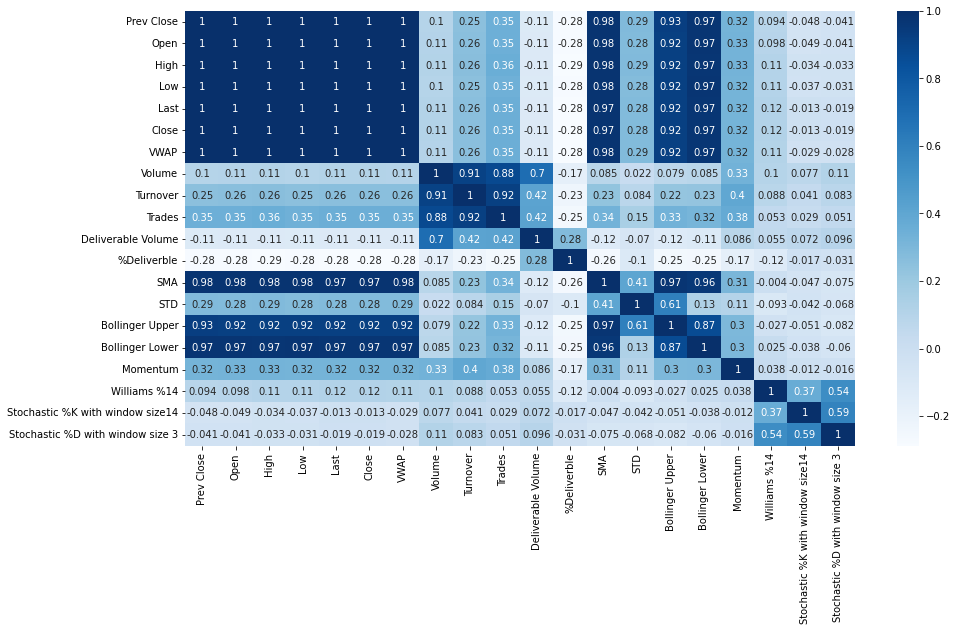

In [73]:
sns.heatmap(dfscaled.corr(),cmap='Blues',annot = True)
plt.gcf().set_size_inches(15, 8)
plt.show()

In [98]:
### Selecting the whose correlation is 1 and removing the other columns
dff = pd.read_csv("FinalDS.csv")
df = deepcopy(dff)
df = df.drop(['Date'], axis = 1)
df = df.drop(['Volume'], axis = 1)
df = df.drop(['Turnover'], axis = 1)
df = df.drop(['Trades'], axis = 1)
df = df.drop(['Deliverable Volume'], axis = 1)
df = df.drop(['%Deliverble'], axis = 1)
df = df.drop(['SMA'], axis = 1)
df = df.drop(['STD'], axis = 1)
df = df.drop(['Bollinger Upper'], axis = 1)
df = df.drop(['Bollinger Lower'], axis = 1)
df = df.drop(['Momentum'], axis = 1)
df = df.drop(['Williams %14'], axis = 1)
df = df.drop(['Stochastic %K with window size14'], axis = 1)
df = df.drop(['Stochastic %D with window size 3'], axis = 1)
df = df.drop(['Symbol'], axis = 1)
df = df.drop(['Series'], axis = 1)
#df.head()
dfx = deepcopy(df)

lastcol = len(df.columns)
dfnumb = df[df.columns[list(range(1,lastcol))]]
cols = list(dfnumb.columns)
#print(cols)
#print(dfnumb)
dfsc = pd.DataFrame(df, columns = cols)
dfsc.head()

,Prev Close,Open,High,Low,Last,Close,VWAP
0,593.20,595.0,605.3,570.00,591.80,593.40,590.59
1,593.40,625.0,625.0,585.10,588.00,589.65,590.78
2,589.65,580.5,623.0,575.15,598.90,597.75,605.82
3,597.75,615.0,615.0,586.00,611.00,608.60,609.93
4,608.60,610.0,620.0,605.00,610.75,610.20,612.70


In [106]:
### Splitting the dataset
df2 = deepcopy(dfsc)

#trainset
train = deepcopy(df2.loc[0:1011])
trainY = train.Close.values
del train["Close"]
trainX = train.values.astype(np.float64)
#print(trainX.shape)
#print(trainY.shape)
#print(trainX)
#print(trainY)

#validationset
valid = deepcopy(df2.loc[1011:1262])
validY = valid.Close.values
del valid["Close"]
validX = valid.values.astype(np.float64)
#print(validX.shape)
#print(validY.shape) 
#print(validX)
#print(validY)

#testset
test = deepcopy(df2.loc[1262:1512])
testY = test.Close.values
del test["Close"]
testX = test.values.astype(np.float64) 
#print(testX.shape)
#print(testY.shape) 
#print(testX)
#print(testY)

### Performing MLR
reg = LinearRegression()
reg.fit(trainX, trainY)

#Combining Train and Validation Set
trainXY = deepcopy(df2.loc[0:1262])
TrainY = trainXY.Close.values
del trainXY["Close"]
TrainX = trainXY.values.astype(np.float64)

#Re-training 
reg1.fit(TrainX, TrainY)

#Predicting on test set
print("Linear Regression:")
validp = reg.predict(validX)
print(sqrt(mean_squared_error(validp, validY)))
testp = reg1.predict(testX)
print(sqrt(mean_squared_error(testp, testY)))

#Predicting using L1:
print("\nLasso Regression:")
lin1 = Lasso(alpha=0.1)
lin1.fit(trainX, trainY)
validp1 = lin1.predict(validX)
print(sqrt(mean_squared_error(validp1, validY)))
lin1.fit(TrainX, TrainY)
testp1 = lin1.predict(testX)
print(sqrt(mean_squared_error(testp1, testY)))

#Predicting using L2:
print("\nRidge Regression:")
lin2 = Ridge(alpha=0.1)
lin2.fit(trainX, trainY)
validp2 = lin2.predict(validX)
print(sqrt(mean_squared_error(validp2, validY)))
lin2.fit(TrainX, TrainY)
testp2 = lin2.predict(testX)
print(sqrt(mean_squared_error(testp2, testY)))

Linear Regression:
0.4946536423418256
0.5196346091564397

Lasso Regression:
0.9516304142557919
1.2104468932264056

Ridge Regression:
0.49465322595381395
0.5196346769498243


In [113]:
### Performing Multilinear Regression for different time windows

window = 20

#Transform Function for making windows
def transform(dfscaled, win):
  df2 = deepcopy(dfscaled)
  col = df2.columns
  for i in range(2, win+1):
    for c in col:
      df2[c+str(i)] = df2[c].shift(-(i-1)) #stepback i-1 times
  df2['Close'+str(win+1)] = df2['Close'].shift(-(win)) #stepback i-1 times
  return df2

print("window"+str(20))
df2 = transform(dfsc, 20)
df2 = df2.dropna()
tsterr, trainerr = [], []
#MLR = Ridge(alpha=0.1)
#MLR = Lasso(alpha=0.1)
MLR = LinearRegression()
for i in range(1, 19):
  trainn = deepcopy(df2.loc[0:1011+(i*14)])
  testt = deepcopy(df2.loc[1262:1512])
  trainnY = trainn.Close.values
  del trainn["Close"]
  trainnX = trainn.values.astype(np.float64)
  testtY = testt.Close.values
  del testt["Close"]
  testtX = testt.values.astype(np.float64) 
  MLR.fit(trainnX, trainnY)
  trainp = MLR.predict(trainnX)
  testp = MLR.predict(testtX)
  trainerr.append(sqrt(mean_squared_error(trainp, trainnY)))
  tsterr.append(sqrt(mean_squared_error(testp, testtY))) 

print("TestE" + " " + "TrainE")
for i in range(0, 18):
  outt = "{:.15f} {:.15f}"
  print(outt.format(float(tsterr[i]), float(trainerr[i])))
print(df2.shape)
d = {'Test RMSE': tsterr, 'Train RMSE': trainerr}
dff = pd.DataFrame(data = d)
#print(dff)
dff.to_excel('result.xlsx')

window20
TestE TrainE
0.000000000000601 0.000000000000584
0.000000000001284 0.000000000001416
0.000000000000721 0.000000000000744
0.000000000000642 0.000000000000703
0.000000000000491 0.000000000000678
0.000000000000466 0.000000000000490
0.000000000000211 0.000000000000311
0.000000000000359 0.000000000000529
0.000000000000477 0.000000000000531
0.000000000000084 0.000000000000230
0.000000000000649 0.000000000000697
0.000000000000268 0.000000000000356
0.000000000000191 0.000000000000266
0.000000000000516 0.000000000000632
0.000000000000537 0.000000000000538
0.000000000000206 0.000000000000264
0.000000000000086 0.000000000000223
0.000000000000301 0.000000000000327
(3213, 141)


In [110]:
### Performing Multilinear Regression for different time windows

window = 40

#Transform Function for making windows
def transform(dfscaled, win):
  df2 = deepcopy(dfscaled)
  col = df2.columns
  for i in range(2, win+1):
    for c in col:
      df2[c+str(i)] = df2[c].shift(-(i-1)) #stepback i-1 times
  df2['Close'+str(win+1)] = df2['Close'].shift(-(win)) #stepback i-1 times
  return df2

print("window"+str(40))
df2 = transform(dfsc, 40)
df2 = df2.dropna()
tsterr, trainerr = [], []
#MLR = Ridge(alpha=0.1)
#MLR = Lasso(alpha=0.1)
MLR = LinearRegression()
for i in range(1, 19):
  trainn = deepcopy(df2.loc[0:1011+(i*14)])
  testt = deepcopy(df2.loc[1262:1512])
  trainnY = trainn.Close.values
  del trainn["Close"]
  trainnX = trainn.values.astype(np.float64)
  testtY = testt.Close.values
  del testt["Close"]
  testtX = testt.values.astype(np.float64) 
  MLR.fit(trainnX, trainnY)
  trainp = MLR.predict(trainnX)
  testp = MLR.predict(testtX)
  trainerr.append(sqrt(mean_squared_error(trainp, trainnY)))
  tsterr.append(sqrt(mean_squared_error(testp, testtY))) 

print("TestE" + " " + "TrainE")
for i in range(0, 18):
  outt = "{:.15f} {:.15f}"
  print(outt.format(float(tsterr[i]), float(trainerr[i])))
print(df2.shape)
d = {'Test RMSE': tsterr, 'Train RMSE': trainerr}
dff = pd.DataFrame(data = d)
#print(dff)
dff.to_excel('result.xlsx')

window40
TestE TrainE
0.000000000001978 0.000000000002037
0.000000000000555 0.000000000000652
0.000000000000703 0.000000000000944
0.000000000001140 0.000000000001376
0.000000000000838 0.000000000000943
0.000000000001237 0.000000000001337
0.000000000001354 0.000000000001543
0.000000000000349 0.000000000000703
0.000000000000475 0.000000000000793
0.000000000000343 0.000000000000534
0.000000000000249 0.000000000000565
0.000000000000285 0.000000000000529
0.000000000000494 0.000000000000865
0.000000000000225 0.000000000000576
0.000000000003127 0.000000000003958
0.000000000002380 0.000000000003041
0.000000000001726 0.000000000002225
0.000000000001964 0.000000000002716
(3193, 281)


In [114]:
### Performing Multilinear Regression for different time windows

window = 60

#Transform Function for making windows
def transform(dfscaled, win):
  df2 = deepcopy(dfscaled)
  col = df2.columns
  for i in range(2, win+1):
    for c in col:
      df2[c+str(i)] = df2[c].shift(-(i-1)) #stepback i-1 times
  df2['Close'+str(win+1)] = df2['Close'].shift(-(win)) #stepback i-1 times
  return df2

print("window"+str(60))
df2 = transform(dfsc, 60)
df2 = df2.dropna()
tsterr, trainerr = [], []
#MLR = Ridge(alpha=0.1)
#MLR = Lasso(alpha=0.1)
MLR = LinearRegression()
for i in range(1, 19):
  trainn = deepcopy(df2.loc[0:1011+(i*14)])
  testt = deepcopy(df2.loc[1262:1512])
  trainnY = trainn.Close.values
  del trainn["Close"]
  trainnX = trainn.values.astype(np.float64)
  testtY = testt.Close.values
  del testt["Close"]
  testtX = testt.values.astype(np.float64) 
  MLR.fit(trainnX, trainnY)
  trainp = MLR.predict(trainnX)
  testp = MLR.predict(testtX)
  trainerr.append(sqrt(mean_squared_error(trainp, trainnY)))
  tsterr.append(sqrt(mean_squared_error(testp, testtY))) 

print("TestE" + " " + "TrainE")
for i in range(0, 18):
  outt = "{:.15f} {:.15f}"
  print(outt.format(float(tsterr[i]), float(trainerr[i])))
print(df2.shape)
d = {'Test RMSE': tsterr, 'Train RMSE': trainerr}
dff = pd.DataFrame(data = d)
#print(dff)
dff.to_excel('result.xlsx')

window60
TestE TrainE
0.000000000001545 0.000000000001855
0.000000000000197 0.000000000000881
0.000000000002335 0.000000000002517
0.000000000001290 0.000000000001718
0.000000000002393 0.000000000002614
0.000000000002220 0.000000000002536
0.000000000002474 0.000000000003014
0.000000000001903 0.000000000002302
0.000000000000422 0.000000000000909
0.000000000000832 0.000000000001347
0.000000000000523 0.000000000000895
0.000000000000820 0.000000000001182
0.000000000000895 0.000000000001275
0.000000000000179 0.000000000000781
0.000000000000248 0.000000000000743
0.000000000000198 0.000000000000835
0.000000000001258 0.000000000001587
0.000000000001223 0.000000000001550
(3173, 421)


In [90]:
### Finding the best window through validation

w = [20,40,60]
for i in w:
  print("\nwindow"+str(i))
  df2 = transform(dfvalid, i)
  df2 = df2.dropna()
  #trainset
  train = deepcopy(df2.loc[1300:2100])
  trainY = train.Close.values
  del train["Close"]
  trainX = train.values.astype(np.float64)
  #validationset
  valid = deepcopy(df2.loc[2100:2200])
  validY = valid.Close.values
  del valid["Close"]
  validX = valid.values.astype(np.float64)
  #testset
  test = deepcopy(df2.loc[2200:2300])
  testY = test.Close.values
  del test["Close"]
  testX = test.values.astype(np.float64) 
  # Validation
  reg = LinearRegression()
  reg.fit(trainX, trainY)
  pred = reg.predict(validX)
  print("RMSE on validation set:") 
  print(sqrt(mean_squared_error(pred, validY)))
  #Combining Train and Validation Set
  trainXY = deepcopy(df2.loc[1300:2200])
  TrainY = trainXY.Close.values
  del trainXY["Close"]
  TrainX = trainXY.values.astype(np.float64)
  #Re-training 
  reg.fit(TrainX, TrainY)
  #Predicting on test set
  print("RMSE on test set:")
  testp = reg.predict(testX)
  print(sqrt(mean_squared_error(testp, testY)))


window20
RMSE on validation set:
0.6549131067989894
RMSE on test set:
0.5591381424234386

window40
RMSE on validation set:
1.151791283595908
RMSE on test set:
0.7911012317777099

window60
RMSE on validation set:
0.7681558721931099
RMSE on test set:
0.31732350182006674


In [95]:
### Finding the best window without validation

w = [20,40,60]
for i in w:
  print("\nwindow"+str(i))
  df2 = transform(dfvalid, i)
  df2 = df2.dropna()
  #trainset
  train = deepcopy(df2.loc[1300:2100])
  trainY = train.Close.values
  del train["Close"]
  trainX = train.values.astype(np.float64)
  #testset
  test = deepcopy(df2.loc[2100:2300])
  testY = test.Close.values
  del test["Close"]
  testX = test.values.astype(np.float64) 
  #Training
  reg.fit(trainX, trainY)
  #Predicting on test set
  print("RMSE on test set:")
  testp = reg.predict(testX)
  print(sqrt(mean_squared_error(testp, testY)))


window20
RMSE on test set:
0.6467811286148354

window40
RMSE on test set:
1.20041037454543

window60
RMSE on test set:
0.7616990806955067


In [99]:
### Finding the best window through validation for selected features

w = [20,40,60]
for i in w:
  print("\nwindow"+str(i))
  df2 = transform(dfx, i)
  df2 = df2.dropna()
  #trainset
  train = deepcopy(df2.loc[1300:2100])
  trainY = train.Close.values
  del train["Close"]
  trainX = train.values.astype(np.float64)
  #validationset
  valid = deepcopy(df2.loc[2100:2200])
  validY = valid.Close.values
  del valid["Close"]
  validX = valid.values.astype(np.float64)
  #testset
  test = deepcopy(df2.loc[2200:2300])
  testY = test.Close.values
  del test["Close"]
  testX = test.values.astype(np.float64) 
  # Validation
  reg = LinearRegression()
  reg.fit(trainX, trainY)
  pred = reg.predict(validX)
  print("RMSE on validation set:") 
  print(sqrt(mean_squared_error(pred, validY)))
  #Combining Train and Validation Set
  trainXY = deepcopy(df2.loc[1300:2200])
  TrainY = trainXY.Close.values
  del trainXY["Close"]
  TrainX = trainXY.values.astype(np.float64)
  #Re-training 
  reg.fit(TrainX, TrainY)
  #Predicting on test set
  print("RMSE on test set:")
  testp = reg.predict(testX)
  print(sqrt(mean_squared_error(testp, testY)))


window20
RMSE on validation set:
1.2504400902035117e-13
RMSE on test set:
1.5510593790698388e-13

window40
RMSE on validation set:
1.795320670988023e-13
RMSE on test set:
4.193173822853186e-13

window60
RMSE on validation set:
3.91868290731572e-13
RMSE on test set:
4.4737104695776334e-13


In [100]:
### Finding the best window without validation for selected features

w = [20,40,60]
for i in w:
  print("\nwindow"+str(i))
  df2 = transform(dfx, i)
  df2 = df2.dropna()
  #trainset
  train = deepcopy(df2.loc[1300:2100])
  trainY = train.Close.values
  del train["Close"]
  trainX = train.values.astype(np.float64)
  #testset
  test = deepcopy(df2.loc[2100:2300])
  testY = test.Close.values
  del test["Close"]
  testX = test.values.astype(np.float64) 
  #Training
  reg.fit(trainX, trainY)
  #Predicting on test set
  print("RMSE on test set:")
  testp = reg.predict(testX)
  print(sqrt(mean_squared_error(testp, testY)))


window20
RMSE on test set:
1.3718740630177738e-13

window40
RMSE on test set:
2.618587770167095e-13

window60
RMSE on test set:
4.2285661672879245e-13
